In [1]:
import sys  
sys.path.insert(1, '.\..\..\SOURCES\.')

import random

random.seed(10)

from DATA import InubushiErgodic

data = InubushiErgodic(nu=-1)
data.delay_timeseries(1)
data.split([80,0,20])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()


In [2]:
from IPMask import IPMask

In [3]:
from Metrics import *
from IPReservoir import IPReservoir

In [4]:
ip_res = IPReservoir(N=100, bias=False, desired_rho=0.8, mask=IPMask.bimodal(100, std=0.15,)) #Wu_sparsity=0.5, Wh_sparsity=0.5)

- Epoch: 1) | KL Divergence value: 0.059902239590883255. | Spectral radius: 0.8078131675720215
- Epoch: 2) | KL Divergence value: 0.04582993686199188. | Spectral radius: 0.815622091293335
- Epoch: 3) | KL Divergence value: 0.037948597222566605. | Spectral radius: 0.8231943845748901
- Epoch: 4) | KL Divergence value: 0.033173054456710815. | Spectral radius: 0.8306328654289246
- Epoch: 5) | KL Divergence value: 0.030097516253590584. | Spectral radius: 0.8380705118179321
- Epoch: 6) | KL Divergence value: 0.02801637165248394. | Spectral radius: 0.8455075025558472
- Epoch: 7) | KL Divergence value: 0.026551181450486183. | Spectral radius: 0.8529478907585144
- Epoch: 8) | KL Divergence value: 0.025486622005701065. | Spectral radius: 0.8603861331939697
- Epoch: 9) | KL Divergence value: 0.024682199582457542. | Spectral radius: 0.867451548576355
- Epoch: 10) | KL Divergence value: 0.024071315303444862. | Spectral radius: 0.874518632888794
- Epoch: 11) | KL Divergence value: 0.0236015394330024

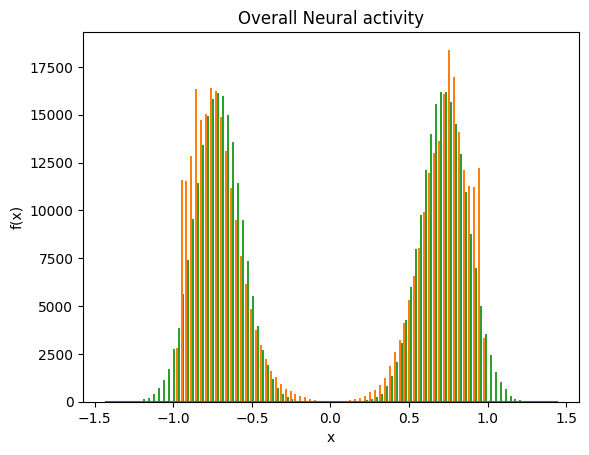

In [6]:
ip_res = IPReservoir(N=100, bias=False, desired_rho=0.8, mask=IPMask.bimodal(100, std=0.15,)) #Wu_sparsity=0.5, Wh_sparsity=0.5)
ip_res.IP_online(X_TR, eval_kl=X_TR, eta=0.0000025, epochs=15 ,verbose = True)
ip_res.plot_neural_activity(X_TR)

In [7]:
from Configuartions import IPReservoirConfiguration, ReservoirConfiguration

from Evaluator import Evaluator

In [8]:
Evaluator.evaluate_estrinsic(ip_res, data, MSE())

Reservoir warmed up with the first 100 time steps


tensor(2.1397e-06)

In [9]:
DeltaPhi().evaluate(ip_res)

0.17443540860660567

In [10]:
MC().evaluate(ip_res)


tensor(7.3106)

In [11]:
Neff().evaluate(ip_res)

1.4830115713347998

In [12]:
MLLE(X_TS).evaluate(ip_res)

-0.77307135